In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv("../data/2017-18__-_2021-22_Demographic_Snapshot_20240410.csv")

In [3]:
df.columns

Index(['DBN', 'School Name', 'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

In [4]:
df = df.drop(['School Name','Grade 3K','Total Enrollment',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners'], axis=1)

In [5]:
df

,DBN,Year,# Poverty,% Poverty,Economic Need Index
0,01M015,2017-18,161,84.7%,89.0%
1,01M015,2018-19,147,84.5%,88.8%
2,01M015,2019-20,155,81.6%,86.7%
3,01M015,2020-21,161,83.4%,86.4%
4,01M015,2021-22,150,83.8%,87.9%
...,...,...,...,...,...
9246,84X730,2017-18,258,82.2%,89.1%
9247,84X730,2018-19,363,84.4%,88.8%
9248,84X730,2019-20,453,86.6%,89.2%
9249,84X730,2020-21,547,87.4%,88.9%


In [6]:
df['District'] = df['DBN'].str[:2]
df['Borough'] = df['DBN'].str[2]

In [7]:
df

,DBN,Year,# Poverty,% Poverty,Economic Need Index,District,Borough
0,01M015,2017-18,161,84.7%,89.0%,01,M
1,01M015,2018-19,147,84.5%,88.8%,01,M
2,01M015,2019-20,155,81.6%,86.7%,01,M
3,01M015,2020-21,161,83.4%,86.4%,01,M
4,01M015,2021-22,150,83.8%,87.9%,01,M
...,...,...,...,...,...,...,...
9246,84X730,2017-18,258,82.2%,89.1%,84,X
9247,84X730,2018-19,363,84.4%,88.8%,84,X
9248,84X730,2019-20,453,86.6%,89.2%,84,X
9249,84X730,2020-21,547,87.4%,88.9%,84,X


In [8]:
df['Year'] = df['Year'].str.split('-').str[0]

In [9]:
df["District"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '75',
       '79', '84'], dtype=object)

In [10]:
# removing values in rows 
df = df[~df['District'].isin([75,79,84])]

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df= df.drop(['DBN'], axis=1)

In [13]:
df

,Year,# Poverty,% Poverty,Economic Need Index,District,Borough
0,2017,161,84.7%,89.0%,01,M
1,2018,147,84.5%,88.8%,01,M
2,2019,155,81.6%,86.7%,01,M
3,2020,161,83.4%,86.4%,01,M
4,2021,150,83.8%,87.9%,01,M
...,...,...,...,...,...,...
9246,2017,258,82.2%,89.1%,84,X
9247,2018,363,84.4%,88.8%,84,X
9248,2019,453,86.6%,89.2%,84,X
9249,2020,547,87.4%,88.9%,84,X


In [14]:
# Strip any whitespace from 'District' values
df['District'] = df['District'].str.strip()

# Convert 'District' to integer
df['District'] = df['District'].astype(int)

# Verify the conversion
print("\nData types after conversion:")
print(df.dtypes)

df = df[~df['District'].isin([75, 79, 84])]




Data types after conversion:
Year                   object
# Poverty              object
% Poverty              object
Economic Need Index    object
District                int32
Borough                object
dtype: object


In [15]:
df['Economic Need Index'].unique()

array(['89.0%', '88.8%', '86.7%', '86.4%', '87.9%', '67.9%', '68.7%',
       '70.4%', '69.6%', '67.8%', '80.0%', '75.4%', '78.4%', '77.0%',
       '75.3%', '93.7%', '94.8%', 'Above 95%', '94.4%', '76.2%', '73.7%',
       '76.5%', '88.2%', '89.5%', '91.6%', '90.3%', '86.3%', '58.0%',
       '59.4%', '62.7%', '65.1%', '66.3%', '90.1%', '94.6%', '94.2%',
       '91.3%', '90.0%', '93.3%', '92.5%', '91.7%', '91.1%', '91.2%',
       '90.2%', '90.7%', '89.7%', '65.3%', '67.2%', '67.1%', '65.5%',
       '62.1%', '89.9%', '87.5%', '87.8%', '83.4%', '84.2%', '36.9%',
       '34.9%', '38.2%', '39.8%', '43.8%', '84.8%', '81.6%', '81.7%',
       '85.3%', '84.9%', '50.5%', '53.4%', '53.6%', '54.6%', '52.1%',
       '47.8%', '46.0%', '46.2%', '49.1%', '55.4%', '57.9%', '57.2%',
       '60.7%', '85.4%', '82.9%', '82.8%', '85.0%', '83.1%', '80.2%',
       '62.9%', '65.4%', '64.7%', '65.0%', '92.4%', '94.1%', '28.2%',
       '26.9%', '29.1%', '28.7%', '25.6%', '85.5%', '88.6%', '41.4%',
       '40.6%', 

In [16]:
# replacing "Above 95%" to "95%"
df.loc[:, 'Economic Need Index'] = df['Economic Need Index'].replace({'Above 95%' : '95%'})

In [17]:
df.loc[:, 'Economic Need Index'] = df['Economic Need Index'].str.rstrip('%').astype('float') / 100

In [18]:
df['% Poverty'].unique()

array(['84.7%', '84.5%', '81.6%', '83.4%', '83.8%', '77.0%', '73.5%',
       '74.6%', '71.7%', '70.5%', '73.6%', '67.8%', '76.3%', '72.1%',
       '70.1%', 'Above 95%', '81.8%', '77.3%', '77.9%', '74.7%', '92.2%',
       '86.5%', '91.1%', '91.8%', '93.5%', '62.5%', '56.7%', '60.9%',
       '58.7%', '62.7%', '91.9%', '93.6%', '94.9%', '88.4%', '89.5%',
       '95.0%', '93.0%', '68.0%', '66.3%', '67.4%', '62.6%', '92.1%',
       '82.7%', '76.7%', '79.3%', '27.0%', '28.2%', '30.0%', '33.0%',
       '39.4%', '88.7%', '84.2%', '83.0%', '80.2%', '80.1%', '45.7%',
       '49.1%', '47.3%', '52.6%', '48.4%', '43.8%', '41.2%', '41.8%',
       '44.8%', '42.5%', '54.6%', '56.6%', '57.3%', '55.7%', '60.7%',
       '82.8%', '85.2%', '85.3%', '88.1%', '91.0%', '89.2%', '87.2%',
       '87.6%', '88.9%', '83.1%', '65.4%', '67.1%', '65.6%', '67.0%',
       '86.7%', '84.0%', '87.3%', '88.6%', '89.1%', '77.4%', '74.4%',
       '76.8%', '63.8%', '23.9%', '24.5%', '24.0%', '23.5%', '85.1%',
       '86.6%', 

In [19]:
# replacing "Above 95%" to "95%"
df.loc[:, '% Poverty'] = df['% Poverty'].replace({'Above 95%': '95%'})

In [20]:
df.loc[:, '% Poverty'] = df['% Poverty'].str.rstrip('%').astype('float') / 100

In [21]:
# preparing for tableau 
# grouping and aggregating the data

In [22]:
df = df.groupby(['Year', 'Borough', 'District']).agg({
    '% Poverty': 'mean',
    'Economic Need Index': 'mean'
}).reset_index()

In [25]:
df.rename(columns={'% Poverty': 'Poverty %'}, inplace=True)

In [30]:
df['Poverty %'] = df['Poverty %'].astype(str)
df['Economic Need Index'] = df['Economic Need Index'].astype(str)

In [31]:
df['Poverty %'] = df['Poverty %'].str.rstrip('%').astype(float)
df['Economic Need Index'] = df['Economic Need Index'].str.rstrip('%').astype(float)

In [33]:
df

,Year,Borough,District,Poverty %,Economic Need Index
0,2017,K,13,0.756744,0.729359
1,2017,K,14,0.775158,0.789711
2,2017,K,15,0.587306,0.589735
3,2017,K,16,0.876318,0.872136
4,2017,K,17,0.854771,0.802625
...,...,...,...,...,...
155,2021,X,8,0.850000,0.853216
156,2021,X,9,0.920686,0.929443
157,2021,X,10,0.858976,0.867012
158,2021,X,11,0.826435,0.796726


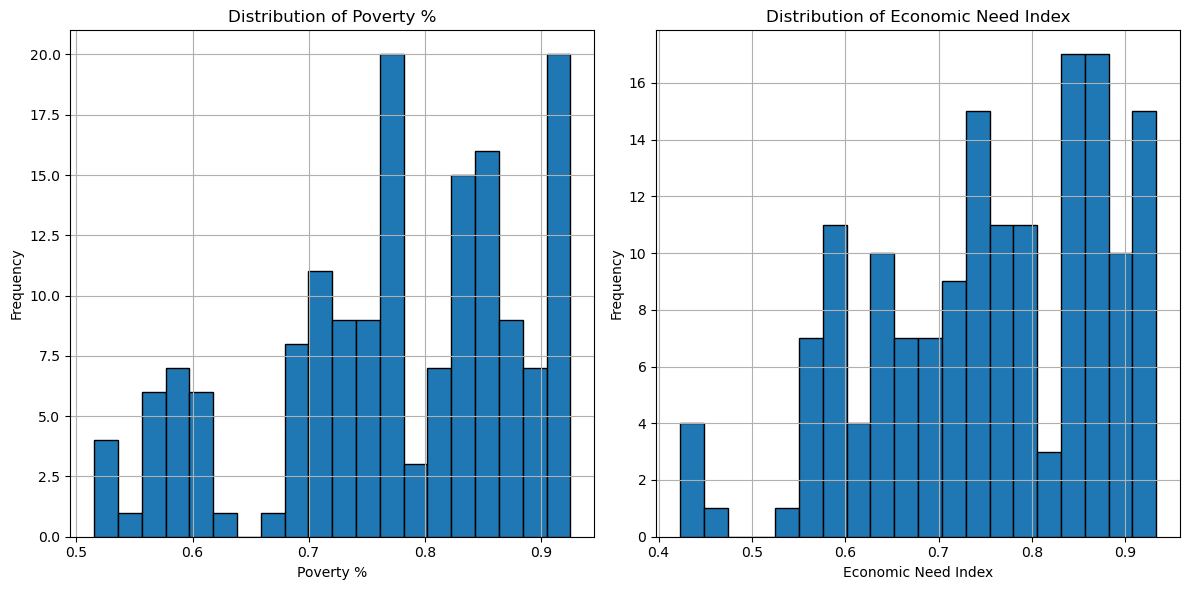

In [36]:
# histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Poverty %'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Poverty %')
plt.xlabel('Poverty %')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['Economic Need Index'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Economic Need Index')
plt.xlabel('Economic Need Index')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# determining the threshold for poverty 
# using 75th percentile to see the top 25% of schools with the highest poverty rates 

In [37]:
# 75th percentile thresholds
threshold_poverty = df['Poverty %'].quantile(0.75)
threshold_eni = df['Economic Need Index'].quantile(0.75)

print(f"75th Percentile Threshold for % Poverty: {threshold_poverty}")
print(f"75th Percentile Threshold for Economic Need Index: {threshold_eni}")

75th Percentile Threshold for % Poverty: 0.8581411764705883
75th Percentile Threshold for Economic Need Index: 0.8609737851662405


In [38]:
df['High % Poverty'] = df['Poverty %'] > threshold_poverty
df['High Economic Need Index'] = df['Economic Need Index'] > threshold_eni

In [39]:
df

,Year,Borough,District,Poverty %,Economic Need Index,High % Poverty,High Economic Need Index
0,2017,K,13,0.756744,0.729359,False,False
1,2017,K,14,0.775158,0.789711,False,False
2,2017,K,15,0.587306,0.589735,False,False
3,2017,K,16,0.876318,0.872136,True,True
4,2017,K,17,0.854771,0.802625,False,False
...,...,...,...,...,...,...,...
155,2021,X,8,0.850000,0.853216,False,False
156,2021,X,9,0.920686,0.929443,True,True
157,2021,X,10,0.858976,0.867012,True,True
158,2021,X,11,0.826435,0.796726,False,False


In [43]:
borough_mapping = {
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'R': 'Staten Island',
    'X': 'Bronx'
}

# replacing values
df['Borough'] = df['Borough'].replace(borough_mapping)

In [48]:
# bool values to 'High' and 'Low'
df['High % Poverty'] = df['High % Poverty'].apply(lambda x: 'High' if x else 'Low')
df['High Economic Need Index'] = df['High Economic Need Index'].apply(lambda x: 'High' if x else 'Low')

In [53]:
df.isnull().sum().sum()

0

In [40]:
# for tableau 

In [50]:
# df.to_csv('poverty_data_for_tableau.csv', index=False)

In [3]:
# df = pd.read_csv("../transformed_data/final_analysis_v2.csv")

In [4]:
df

,District,Year,Attendance Percentage,Number Tested,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4,Subject,DBN,Total Enrollment,Economic Need Index,Borough
0,1,2018,90.905846,4183.0,606.0,18.9,27.0,27.2,27.0,54.1,ELA,01M015,174.0,0.888,Manhattan
1,1,2018,90.905846,4183.0,606.0,18.9,27.0,27.2,27.0,54.1,ELA,01M019,249.0,0.687,Manhattan
2,1,2018,90.905846,4183.0,606.0,18.9,27.0,27.2,27.0,54.1,ELA,01M020,481.0,0.754,Manhattan
3,1,2018,90.905846,4183.0,606.0,18.9,27.0,27.2,27.0,54.1,ELA,01M034,305.0,0.948,Manhattan
4,1,2018,90.905846,4183.0,606.0,18.9,27.0,27.2,27.0,54.1,ELA,01M063,230.0,0.737,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0,2015,0.000000,6580.0,290.0,43.4,36.0,15.0,5.6,20.6,Math,0,0.0,0.000,NaN
12623,0,2014,0.000000,7049.0,287.0,44.5,37.5,14.5,3.5,18.0,ELA,0,0.0,0.000,NaN
12624,0,2014,0.000000,6942.0,290.0,43.2,36.6,14.9,5.3,20.2,Math,0,0.0,0.000,NaN
12625,0,2013,0.000000,7507.0,286.0,47.1,36.9,12.7,3.2,15.9,ELA,0,0.0,0.000,NaN


In [5]:
df['Borough'].unique()

array(['Manhattan', nan, 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [8]:
# df.to_csv('final_analysis.csv', index=False)

In [5]:
# df = pd.read_csv('../transformed_data/ethnicity_results.csv')


performance_levels = ['Pct Level 1', 'Pct Level 2', 'Pct Level 3', 'Pct Level 4']
df_melt = df.melt(id_vars=['Geographic Subdivision', 'Student Category'], value_vars=performance_levels, var_name='Performance Level', value_name='Percentage')


# df_melt.to_csv('ethnicity_results_fo_tableau.csv', index=False)

In [2]:
# df = pd.read_csv('../transformed_data/ethnicity_results_fo_tableau.csv')

In [3]:
df.columns

Index(['Geographic Subdivision', 'Student Category', 'Performance Level',
       'Percentage'],
      dtype='object')

C:\Users\Michael\AppData\Local\Temp\ipykernel_8736\3702411942.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Student Category', y='Percentage', hue='Performance Level', ci=None)


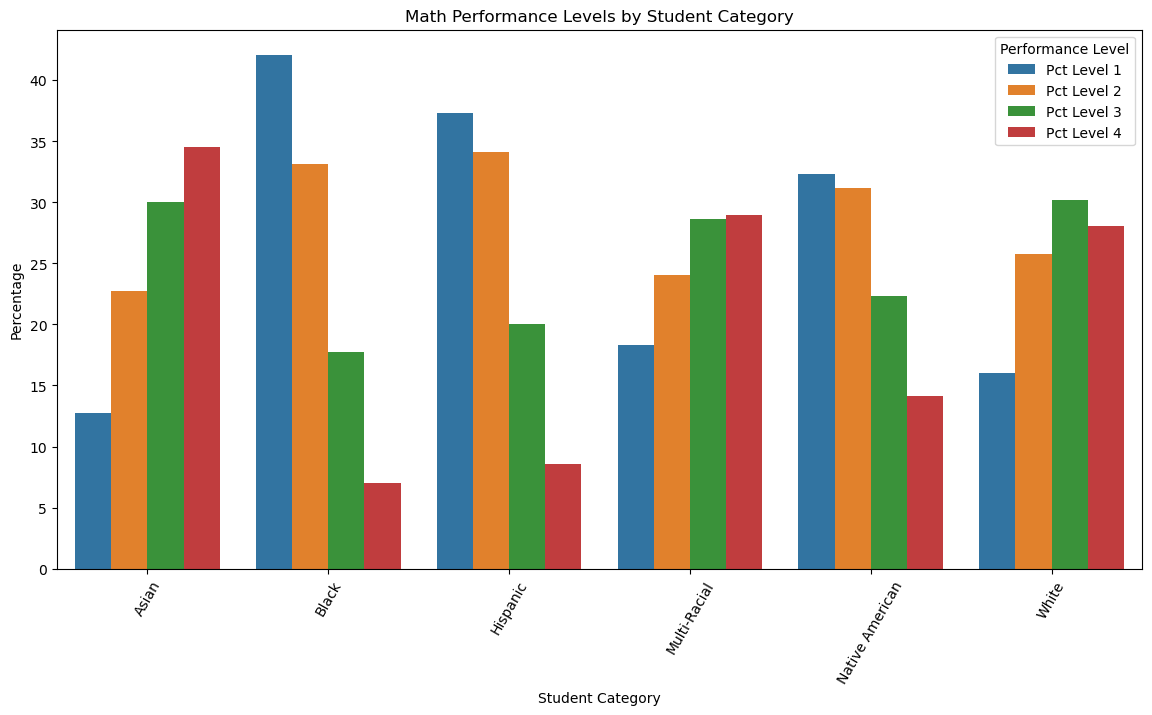

In [7]:
plt.figure(figsize=(14, 7))

sns.barplot(data=df, x='Student Category', y='Percentage', hue='Performance Level', ci=None)
plt.xticks(rotation=60)
plt.title('Math Performance Levels by Student Category')
plt.xlabel('Student Category')
plt.ylabel('Percentage')

plt.show()

In [3]:
df = pd.read_csv('../transformed_data/ethnicity_results.csv')

In [4]:
df.columns

Index(['Geographic Subdivision', 'Grade', 'Year', 'Student Category',
       'Number Tested', 'Mean Scale Score', 'Pct Level 1', 'Pct Level 2',
       'Pct Level 3', 'Pct Level 4', 'Pct Level 3 and 4', 'Subject'],
      dtype='object')